In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import re
from sklearn.utils import shuffle
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
import altair as alt
import folium
from math import pi
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
df = pd.read_csv("c1.csv")

In [ ]:
realNewscsv = pd.read_csv("c1.csv")
realNews = realNewscsv[['date','murder','crime','atiq','encounter']]
realNews.head()

,date,murder,crime,atiq,encounter
0,2023-04-11,12,22,2,1
1,2023-04-12,11,20,2,2
2,2023-04-13,16,22,27,54
3,2023-04-14,14,21,13,25
4,2023-04-15,26,21,64,29


#### 1. Examination of data distribution

In [ ]:
print("Datacount : ", realNews.shape)

Datacount :  (11, 5)


In [ ]:
print("Datainfo: \n")
realNews.info()

Datainfo: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       11 non-null     object
 1   murder     11 non-null     int64 
 2   crime      11 non-null     int64 
 3   atiq       11 non-null     int64 
 4   encounter  11 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 568.0+ bytes


In [ ]:
realNews.describe()

,murder,crime,atiq,encounter
count,11.000000,11.000000,11.000000,11.000000
mean,17.909091,21.000000,27.181818,18.454545
std,9.669070,1.612452,30.446078,18.975582
min,11.000000,19.000000,2.000000,1.000000
25%,12.500000,20.000000,6.000000,4.500000
50%,14.000000,21.000000,15.000000,9.000000
75%,18.000000,21.500000,32.000000,27.000000
max,44.000000,25.000000,100.000000,54.000000


#### Handling missing values

In [ ]:
realNews.isnull().sum()

date         0
murder       0
crime        0
atiq         0
encounter    0
dtype: int64

In [ ]:
realNews = realNews.dropna()

In [ ]:
print(realNews.shape)
realNews.isnull().sum()

(11, 5)


date         0
murder       0
crime        0
atiq         0
encounter    0
dtype: int64

<Figure size 1500x1500 with 0 Axes>

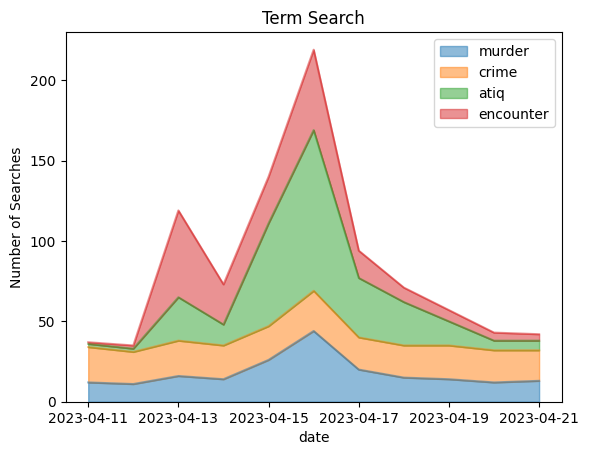

In [ ]:
df = pd.read_csv('c1.csv', index_col='date')

plt.figure(figsize=(15,15))
df.plot(kind='area', alpha=0.5)
plt.xlabel('date')
plt.ylabel('Number of Searches')
plt.title('Term Search')
plt.show()

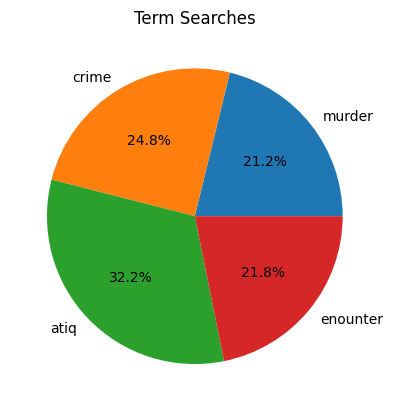

In [ ]:
murder_total = rw['murder'].sum()
crime_total = rw['crime'].sum()
atiq_total = rw['atiq'].dropna().sum() # drop NaN value
encounter_total = rw['encounter'].sum()

# Plot
labels = ['murder', 'crime', 'atiq','enounter']
sizes = [murder_total, crime_total, atiq_total, encounter_total]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

# Title
ax.set_title('Term Searches')

plt.show()

In [ ]:
rw = pd.read_csv("c2.csv")

In [ ]:
rw = rw[['Region','M','A','E','C']]
rw.head()

,Region,M,A,E,C
0,Uttar Pradesh,13%,55%,20%,12%
1,Arunachal Pradesh,37%,NaN,NaN,63%
2,Bihar,18%,45%,16%,21%
3,Uttarakhand,20%,34%,27%,19%
4,Andaman and Nicobar Islands,41%,59%,NaN,NaN


In [ ]:
import csv

# Read the CSV file and modify the data
with open('c2.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    rows = []
    for row in reader:
        new_row = []
        for value in row:
            if value == '':
                new_row.append('2')
            else:
                new_row.append(value.replace('%', ''))
        rows.append(new_row)

# Write the modified data to a new CSV file
with open('new_c2.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(rows)

# Print the contents of the new CSV file to the console
with open('new_c2.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
        print(row)


['Region', 'M', 'C', 'A', 'E']
['Uttar Pradesh', '13', '12', '55', '20']
['Arunachal Pradesh', '37', '63', '2', '2']
['Bihar', '18', '21', '45', '16']
['Uttarakhand', '20', '19', '34', '27']
['Andaman and Nicobar Islands', '41', '2', '59', '2']
['Sikkim', '46', '29', '2', '25']
['Delhi', '23', '21', '29', '27']
['Dadra and Nagar Haveli', '2', '2', '2', '100']
['Madhya Pradesh', '17', '24', '35', '24']
['Jharkhand', '23', '24', '31', '22']
['Haryana', '22', '26', '29', '23']
['Rajasthan', '18', '27', '33', '22']
['Nagaland', '2', '53', '23', '24']
['Punjab', '22', '42', '19', '17']
['Chhattisgarh', '23', '27', '31', '19']
['Gujarat', '21', '34', '22', '23']
['Kerala', '29', '54', '7', '10']
['Chandigarh', '24', '27', '23', '26']
['Maharashtra', '25', '31', '21', '23']
['Goa', '18', '31', '20', '31']
['Manipur', '27', '61', '12', '2']
['Tamil Nadu', '31', '50', '5', '14']
['Tripura', '2', '80', '20', '2']
['Jammu and Kashmir', '19', '39', '21', '21']
['Assam', '29', '40', '14', '17']
['K

In [ ]:
rw_long = rw.melt(id_vars='Region', var_name='M', value_name='C')

# Create bar chart
fig = px.bar(rw_long, x='Region', y='C', color='M', barmode='group')

# Update layout
fig.update_layout(title='Term searches per State',
                  xaxis_title='',
                  yaxis_title='Percentage')

# Show plot
fig.show()

<ipython-input-45-7f100b9448e2>:1: FutureWarning:

This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.

